In [109]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

# Exploring dataset

In [110]:
(X_train, y_train), (X_test,y_test) = datasets.cifar10.load_data()
print('Xtrain: ' , X_train.shape  , 'ytrain:' ,y_train.shape )
print('Xtest: ' , X_test.shape  , 'ytest:' , y_test.shape )

Xtrain:  (50000, 32, 32, 3) ytrain: (50000, 1)
Xtest:  (10000, 32, 32, 3) ytest: (10000, 1)


In [111]:
y_train = y_train.reshape(-1,)
y_test = y_test.reshape(-1,)

In [112]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

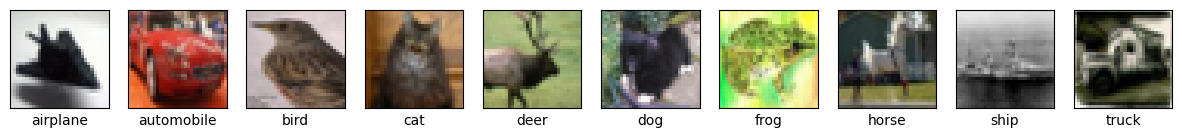

In [113]:
def plot_sample(X, y, classes):
    fig, axes = plt.subplots(1, len(classes), figsize=(15, 2))
    for i, cls in enumerate(classes):
        class_indices = [idx for idx, label in enumerate(y) if label == i]
        axes[i].imshow(X[class_indices[i]])
        axes[i].set_xlabel(cls)
        axes[i].set_xticks([])
        axes[i].set_yticks([])
    plt.show()

plot_sample(X_train, y_train, classes)


# Normalizing

In [114]:
X_train = X_train / 255.0
X_test = X_test / 255.0

In [115]:
from tensorflow import keras
from tensorflow.keras import regularizers
from tensorflow.keras import layers, models, regularizers, initializers
import tensorflow as tf

# Creating Validation set

In [116]:
from sklearn.model_selection import train_test_split
y_train = tf.keras.utils.to_categorical(y_train, num_classes=10)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=10)
xtrain ,xval , ytrain , yval = train_test_split(X_train , y_train , train_size = 0.7)

# Models

In [117]:
def runmodel(model , BS , LR):
    model.compile(
        optimizer= tf.keras.optimizers.SGD(learning_rate=LR),
        loss='categorical_crossentropy',
        metrics=['accuracy'],
    )
    

    early_stopping = keras.callbacks.EarlyStopping(
        patience=5,
        min_delta=0.01,
        restore_best_weights=True,
    )

    history = model.fit(
        xtrain, ytrain,
        validation_data=(xval, yval),
        batch_size=BS,
        epochs=20,
        callbacks=[early_stopping],
    )


    eval = model.evaluate(X_test , y_test)
    print('Test Loss and Accuracy : ' , eval)

# Deep ANN

In [118]:
model = keras.Sequential([
    layers.Flatten(input_shape=(32,32,3)),
    layers.BatchNormalization(),
    layers.Dense(512, activation='relu' ,
                  kernel_initializer=initializers.GlorotNormal(),
                  kernel_regularizer= regularizers.l1_l2(l1=1e-5, l2=1e-4)),
    layers.Dropout(0.3),
    layers.BatchNormalization(),

    layers.Dense(1024, activation='relu' ,
                  kernel_initializer=initializers.GlorotNormal(),
                  kernel_regularizer= regularizers.l1_l2(l1=1e-5, l2=1e-4)),
    layers.Dropout(0.3),
    layers.BatchNormalization(),

    layers.Dense(2048, activation='relu' ,
                  kernel_initializer=initializers.GlorotNormal(),
                  kernel_regularizer= regularizers.l1_l2(l1=1e-5, l2=1e-4)),
    layers.Dropout(0.3),
    layers.BatchNormalization(),
    
    layers.Dense(1024, activation='relu' ,
                  kernel_initializer=initializers.GlorotNormal(),
                  kernel_regularizer= regularizers.l1_l2(l1=1e-5, l2=1e-4)),
    layers.Dropout(0.3),
    layers.BatchNormalization(),
    
    layers.Dense(10, activation = 'softmax'),
])
runmodel(model , BS = 64 , LR= 0.01)

Epoch 1/20
 48/547 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.1269 - loss: 4.6392

W0000 00:00:1713610446.366878      83 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


547/547 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.2153 - loss: 4.2391

W0000 00:00:1713610454.354458      82 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1713610455.751012      83 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


547/547 ━━━━━━━━━━━━━━━━━━━━ 18s 19ms/step - accuracy: 0.2154 - loss: 4.2388 - val_accuracy: 0.3717 - val_loss: 3.5432
Epoch 2/20
547/547 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.3233 - loss: 3.7206 - val_accuracy: 0.4081 - val_loss: 3.4238
Epoch 3/20
547/547 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.3645 - loss: 3.5498 - val_accuracy: 0.4249 - val_loss: 3.3537
Epoch 4/20
547/547 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.3870 - loss: 3.4478 - val_accuracy: 0.4320 - val_loss: 3.3426
Epoch 5/20
547/547 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.4149 - loss: 3.3814 - val_accuracy: 0.4409 - val_loss: 3.3016
Epoch 6/20
547/547 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.4289 - loss: 3.3325 - val_accuracy: 0.4545 - val_loss: 3.2626
Epoch 7/20
547/547 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.4416 - loss: 3.2916 - val_accuracy: 0.4522 - val_loss: 3.2485
Epoch 8/20
547/547 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.4483 - loss: 3.2522 - val_accuracy: 0.4688 - va

W0000 00:00:1713610501.048743      83 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


# AlexNet

In [119]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout


model = Sequential([
    Conv2D(96, kernel_size=(3,3), strides=(4,4), activation='relu', input_shape=(32,32,3)),
    MaxPooling2D(pool_size=(2,2), strides=(2,2)),
    Conv2D(256, kernel_size=(5,5), padding='same', activation='relu'),
    MaxPooling2D(pool_size=(3,3), strides=(2,2)),
    Conv2D(384, kernel_size=(3,3), padding='same', activation='relu'),
    Conv2D(384, kernel_size=(3,3), padding='same', activation='relu'),
    Conv2D(256, kernel_size=(3,3), padding='same', activation='relu'),
    MaxPooling2D(pool_size=(3,3), strides=(2,2), padding='same'),  # Adjusted padding here
    Flatten(),
    Dense(4096, activation='relu'),
    Dropout(0.5),
    Dense(4096, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')])



runmodel(model , BS = 64 , LR= 0.01)


Epoch 1/20
 26/547 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.0894 - loss: 2.3026

W0000 00:00:1713610506.382186      80 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


547/547 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.1012 - loss: 2.3025

W0000 00:00:1713610512.598183      82 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1713610513.792856      82 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


547/547 ━━━━━━━━━━━━━━━━━━━━ 12s 15ms/step - accuracy: 0.1012 - loss: 2.3025 - val_accuracy: 0.1237 - val_loss: 2.3025
Epoch 2/20
547/547 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.1051 - loss: 2.3024 - val_accuracy: 0.1277 - val_loss: 2.3024
Epoch 3/20
547/547 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.1090 - loss: 2.3023 - val_accuracy: 0.0976 - val_loss: 2.3024
Epoch 4/20
547/547 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.1080 - loss: 2.3022 - val_accuracy: 0.1291 - val_loss: 2.3022
Epoch 5/20
547/547 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.1215 - loss: 2.3021 - val_accuracy: 0.1347 - val_loss: 2.3020
Epoch 6/20
547/547 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.1214 - loss: 2.3019 - val_accuracy: 0.1058 - val_loss: 2.3018
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.1276 - loss: 2.3023
Test Loss and Accuracy :  [2.3023974895477295, 0.12389999628067017]


# CNN

In [120]:
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])
runmodel(cnn , BS = 64 , LR= 0.01)

Epoch 1/20
547/547 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.1630 - loss: 2.2534 - val_accuracy: 0.2649 - val_loss: 2.0367
Epoch 2/20
547/547 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.2839 - loss: 1.9896 - val_accuracy: 0.3153 - val_loss: 1.9120
Epoch 3/20
547/547 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.3410 - loss: 1.8689 - val_accuracy: 0.3619 - val_loss: 1.7742
Epoch 4/20
547/547 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.3914 - loss: 1.7144 - val_accuracy: 0.4177 - val_loss: 1.6539
Epoch 5/20
547/547 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.4346 - loss: 1.5819 - val_accuracy: 0.4211 - val_loss: 1.6244
Epoch 6/20
547/547 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.4658 - loss: 1.4896 - val_accuracy: 0.4040 - val_loss: 1.6919
Epoch 7/20
547/547 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.4883 - loss: 1.4383 - val_accuracy: 0.4350 - val_loss: 1.6304
Epoch 8/20
547/547 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.5112 - loss: 1.3783 - val_accuracy: 0.